# **Import Libraries and Load Dataset**

In [ ]:
#Import Libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

In [ ]:
#Load dataset

#dataset path/directory
path='/content/drive/MyDrive/weatherHistory.csv'
df=pd.read_csv(path)
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:
# Statistical Summary of the dataset
df.describe(include='all')

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
count,96453,96453,95936,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000,96453
unique,96429,27,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214
top,2010-08-02 00:00:00.000 +0200,Partly Cloudy,rain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mostly cloudy throughout the day.
freq,2,31733,85224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20085
mean,NaN,NaN,NaN,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956,NaN
std,NaN,NaN,NaN,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906,NaN
min,NaN,NaN,NaN,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
25%,NaN,NaN,NaN,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000,NaN
50%,NaN,NaN,NaN,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000,NaN
75%,NaN,NaN,NaN,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000,NaN


In [ ]:
#Summary of Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


# **Feature Engineering on the Date Column**

More features such as day, month, week, year etc can be extracted from the date column to help improve the model performance

In [ ]:
#Convert Formatted Date type from string to datetime
df['Formatted Date']=pd.to_datetime(df['Formatted Date'], utc=True)

In [ ]:
#Extract hour from datetime column
df['hour']=df['Formatted Date'].dt.hour
#Extract day from datetime column
df['day']=df['Formatted Date'].dt.day
#Extract dayofweek from datetime column
df['dayofweek']=df['Formatted Date'].dt.dayofweek
#Extract month from datetime column
df['month']=df['Formatted Date'].dt.month
#Extract year from datetime column
df['year']=df['Formatted Date'].dt.year

# **Exploratory Data Analysis**

Text(0.5, 1.0, 'Bar plot showing Weather Distribution')

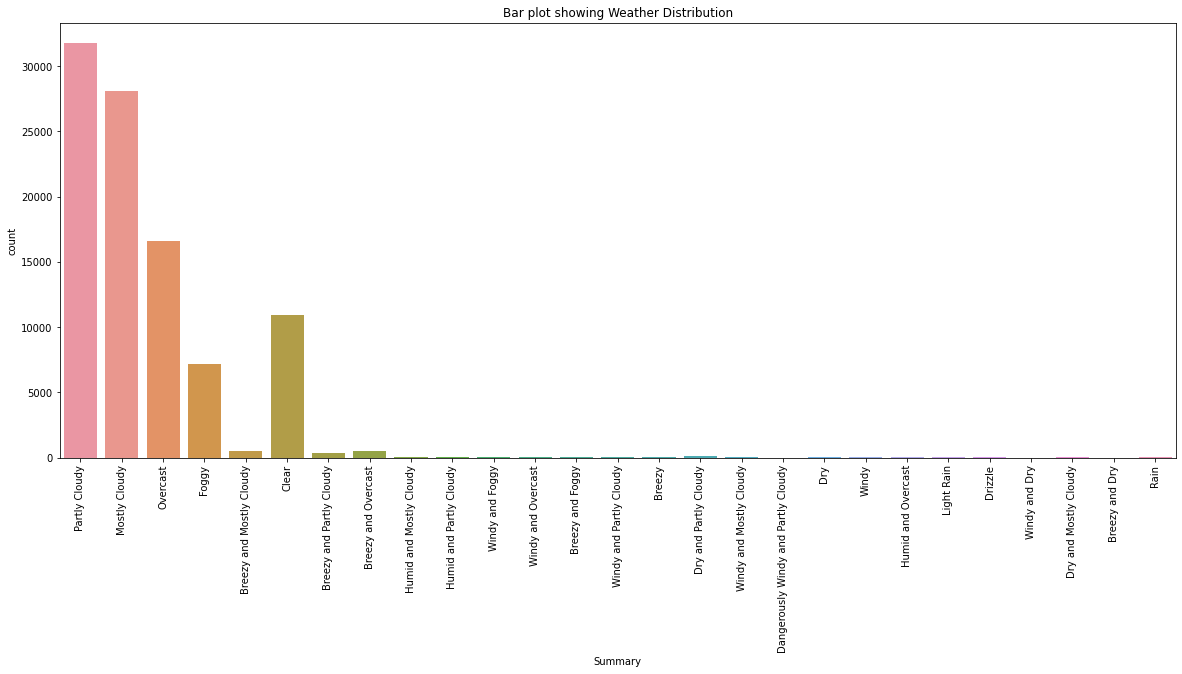

In [ ]:
#Bar plot showing Weather Distribution
plt.figure(figsize=(20,8))
sns.countplot(x=df['Summary'])
plt.xticks(rotation=90)
plt.title('Bar plot showing Weather Distribution')

Text(0.5, 1.0, 'Correlation Plot')

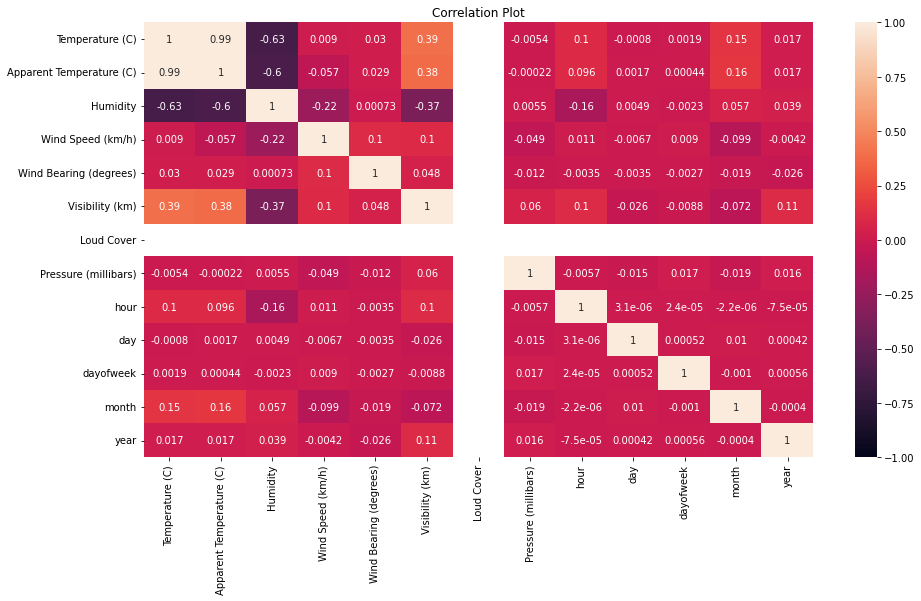

In [ ]:
#Correlation Plot
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1)
plt.title('Correlation Plot')

The correlation plot above reveals the following:
1. The Apparent Temperature Feature is highly correlated with the Temperature
Feature
2. The Loud Cover feature is highly redundant (contains only 0 values).

These two columns(Apparent Temperature and Loud Cover) are therefore best dropped.

In [ ]:
#Drop the Apparent Temperature and Loud Cover Features
df.drop(['Apparent Temperature (C)', 'Loud Cover'], axis=1, inplace=True)

Text(0.5, 1.0, 'Histogram Plot showing Temperature distribition')

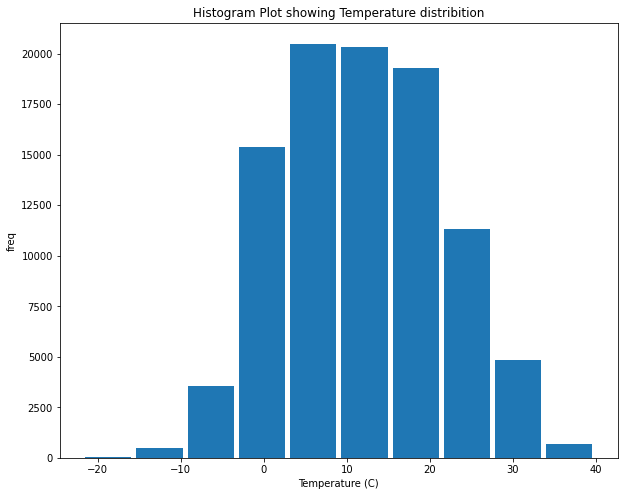

In [ ]:
# Histogram plot showing temperature distribition
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df["Temperature (C)"],bins=10,rwidth=0.9)
plt.xlabel("Temperature (C)")
plt.ylabel("freq")
plt.title('Histogram Plot showing Temperature distribition')

Text(0.5, 1.0, 'Precipiation type Count Plot')

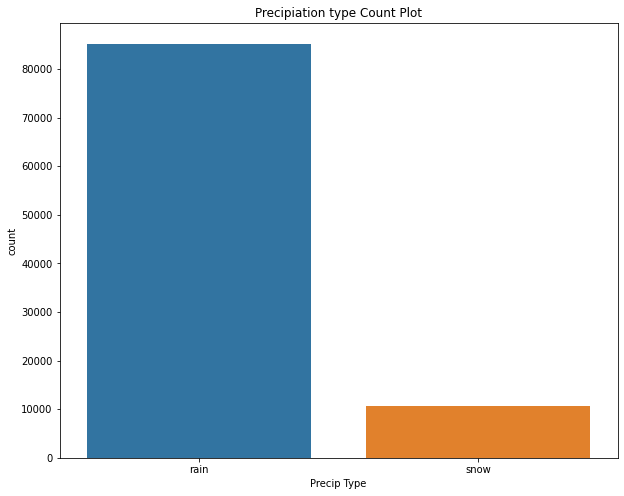

In [ ]:
# Precipiation type Distribution Plot
plt.figure(figsize=(10,8))
sns.countplot(x=df['Precip Type'])
plt.title('Precipiation type Count Plot')

Text(0.5, 1.0, 'Histogram Plot showing Humidity distribition')

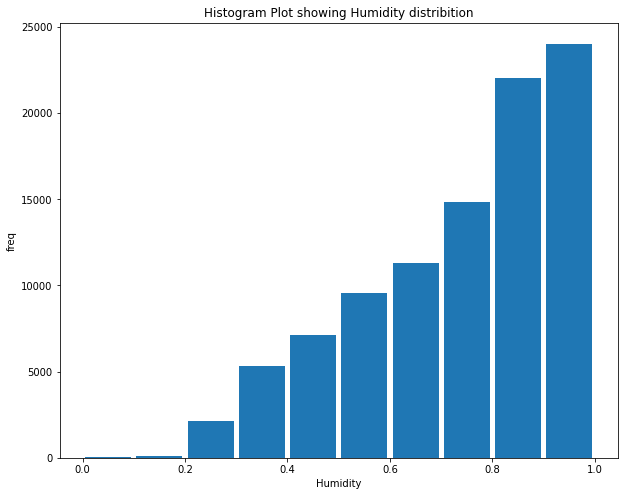

In [ ]:
#Histogram plot showing humidity distribition
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df["Humidity"],bins=10,rwidth=0.9)
plt.xlabel("Humidity")
plt.ylabel("freq")
plt.title('Histogram Plot showing Humidity distribition')

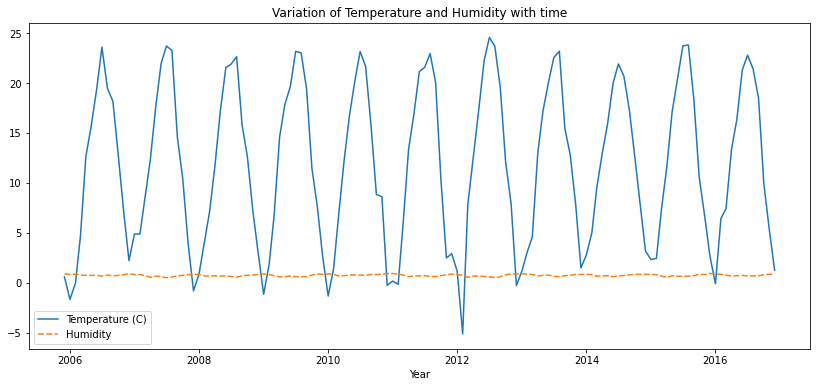

In [ ]:
data = df.set_index("Formatted Date")
df_column = ['Temperature (C)', 'Humidity']
df_monthly_mean = data[df_column].resample("MS").mean()

plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title("Variation of Temperature and Humidity with time")
plt.show()

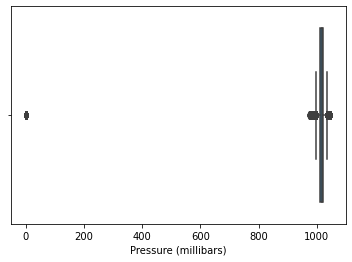

In [ ]:
# Pressure Boxplot
sns.boxplot(x=df["Pressure (millibars)"])

Text(0.5, 1.0, 'Histogram plot showing Wind Bearing distribition')

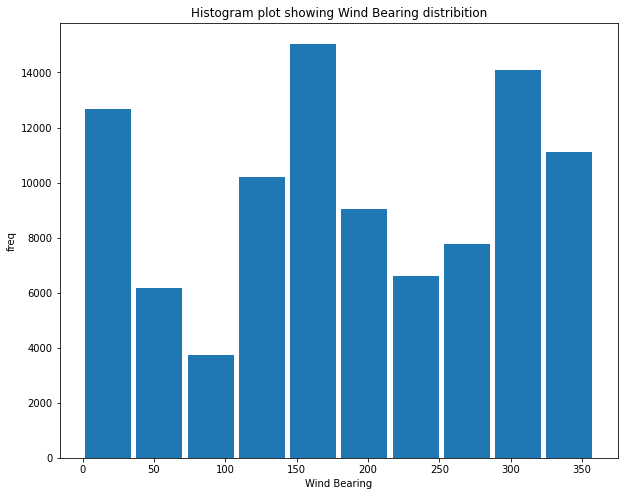

In [ ]:
# Histogram plot showing Wind Bearing distribition
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df["Wind Bearing (degrees)"],bins=10,rwidth=0.9)
plt.xlabel("Wind Bearing")
plt.ylabel("freq")
plt.title('Histogram plot showing Wind Bearing distribition')

Text(0.5, 1.0, 'Scatter plot of Visibility against Wind Speed (km/h)')

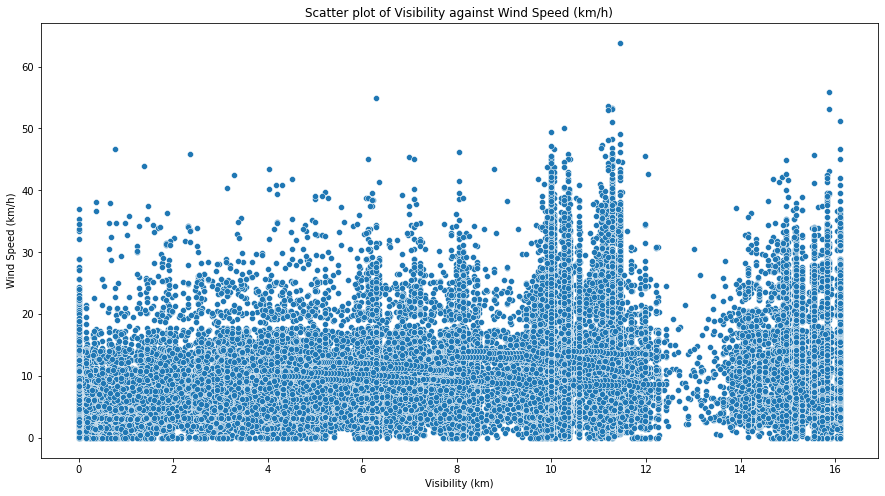

In [ ]:
#Scatter plot of Visibility against Wind Speed (km/h)
plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x="Visibility (km)", y="Wind Speed (km/h)")
plt.title('Scatter plot of Visibility against Wind Speed (km/h)')

# **Filling Missing Values**

In [ ]:
#check for columns with missing values
df.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type               517
Temperature (C)             0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Pressure (millibars)        0
Daily Summary               0
hour                        0
day                         0
dayofweek                   0
month                       0
year                        0
dtype: int64

Only the precip type column contains missing values, the missing values will be filled using the ffill technique

In [ ]:
#Sort dataframe according to date column and reset index
df=df.sort_values('Formatted Date')
df.reset_index(drop=True, inplace=True)

#fill precip type column using ffill technique
df['Precip Type'].fillna(method='ffill', inplace=True)

# **Label encode the Categorical Columns**

In [ ]:
#Label encode the Summary column
summary_encoder=LabelEncoder()
df['Summary']=summary_encoder.fit_transform(df['Summary'])


#Label encode the Precip Type column
precip_type_encoder= LabelEncoder()
df['Precip Type']= precip_type_encoder.fit_transform(df['Precip Type'])

# **Split Data to train and test**

In [ ]:
# separate the dataset into dependent and independent variables
X=df.drop(['Summary', 'Formatted Date', 'Daily Summary'], axis=1) # independent variables
Y=df['Summary']  #dependent variable

# split dataset to train and test
x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size=0.3, random_state=42)

In [ ]:
#Scaling the dataset
scaler=RobustScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# **Building Classifier Models**

In [ ]:
#Labels for confusion matrix
confusion_matrix_labels=np.unique(summary_encoder.inverse_transform(y_test))

**K Nearest neighbor classifier**

In [ ]:
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(x_train_scaled, y_train)
knn_pred=knn_classifier.predict(x_test_scaled)

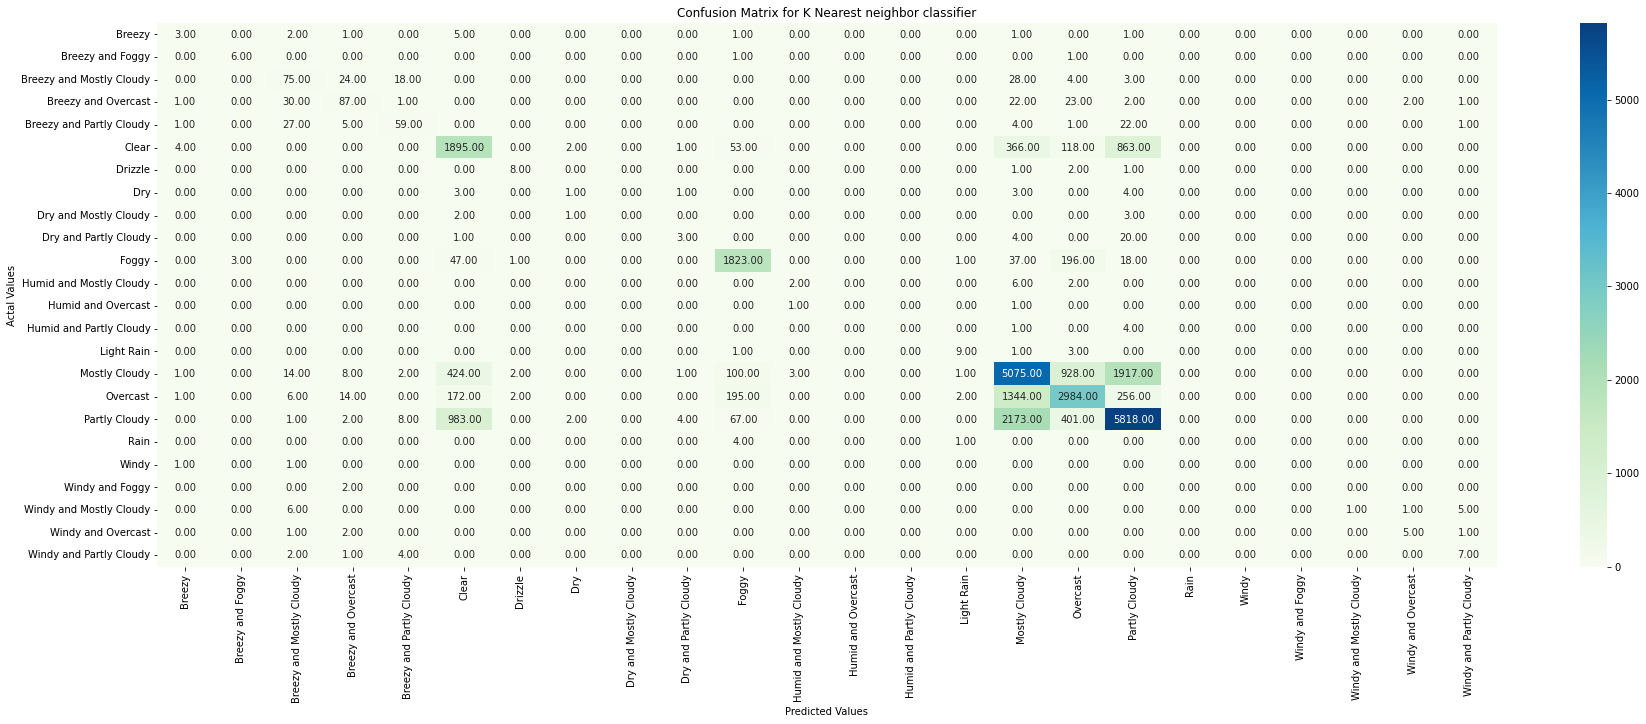

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,knn_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = confusion_matrix_labels ,
                     columns = confusion_matrix_labels)

#Plotting the confusion matrix
plt.figure(figsize=(30,10))
sns.heatmap(cm_df, annot=True, fmt=".2f",cmap="GnBu")
plt.title('Confusion Matrix for K Nearest neighbor classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('Confusion Matrix for K Nearest neighbor classifier.jpg',bbox_inches='tight')
plt.show()


**Support vector classifier**

In [ ]:
svc_classifier= SVC()
svc_classifier.fit(x_train_scaled, y_train)
svc_pred=svc_classifier.predict(x_test_scaled)

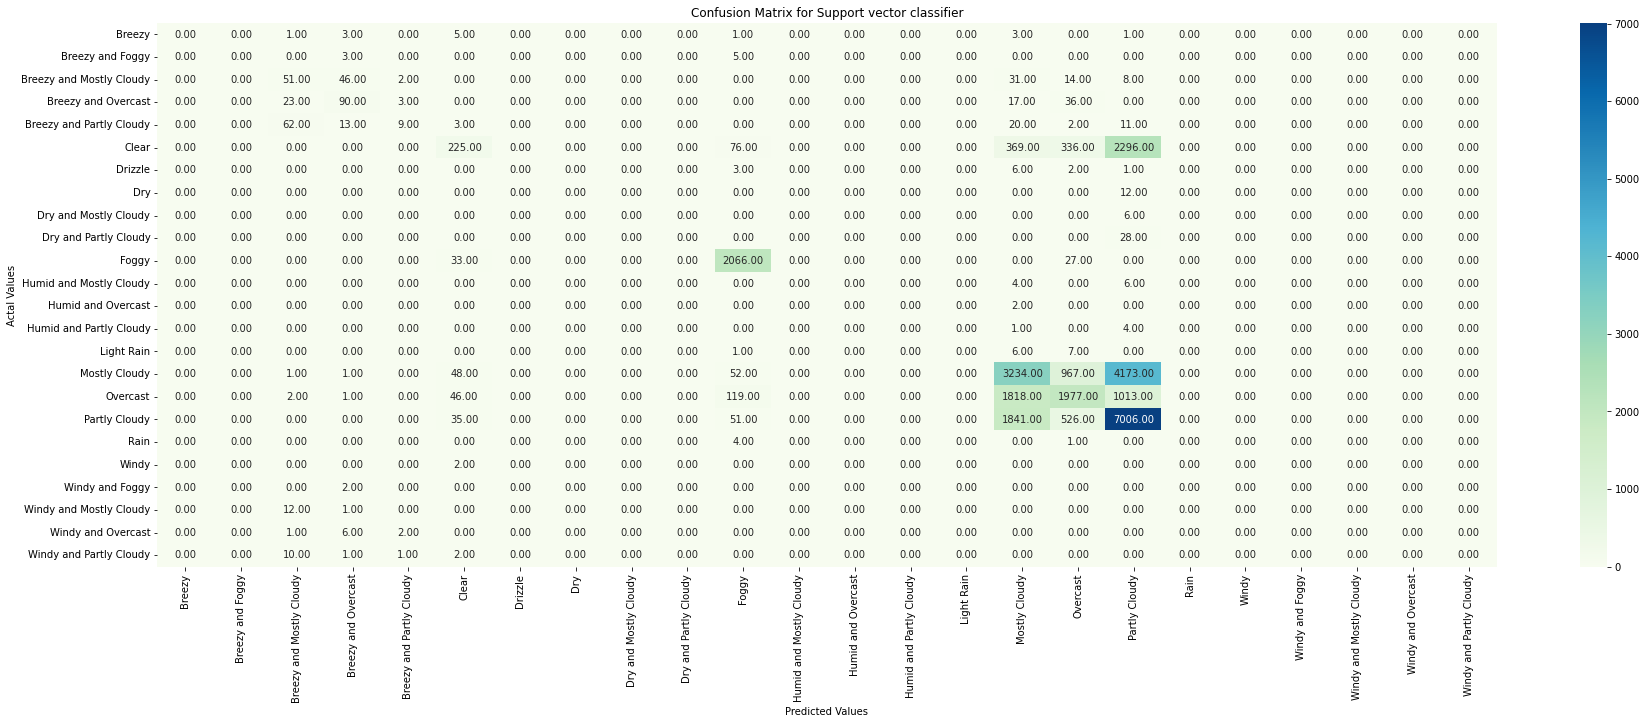

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,svc_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = confusion_matrix_labels ,
                     columns = confusion_matrix_labels)

#Plotting the confusion matrix
plt.figure(figsize=(30,10))
sns.heatmap(cm_df, annot=True, fmt=".2f",cmap="GnBu")
plt.title('Confusion Matrix for Support vector classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('Confusion Matrix for Support vector classifier.jpg',bbox_inches='tight')
plt.show()

**Decision Tree classifier**

In [ ]:
decisiontree_classifier=DecisionTreeClassifier()
decisiontree_classifier.fit(x_train_scaled, y_train)
decisiontree_classifier_pred=decisiontree_classifier.predict(x_test_scaled)

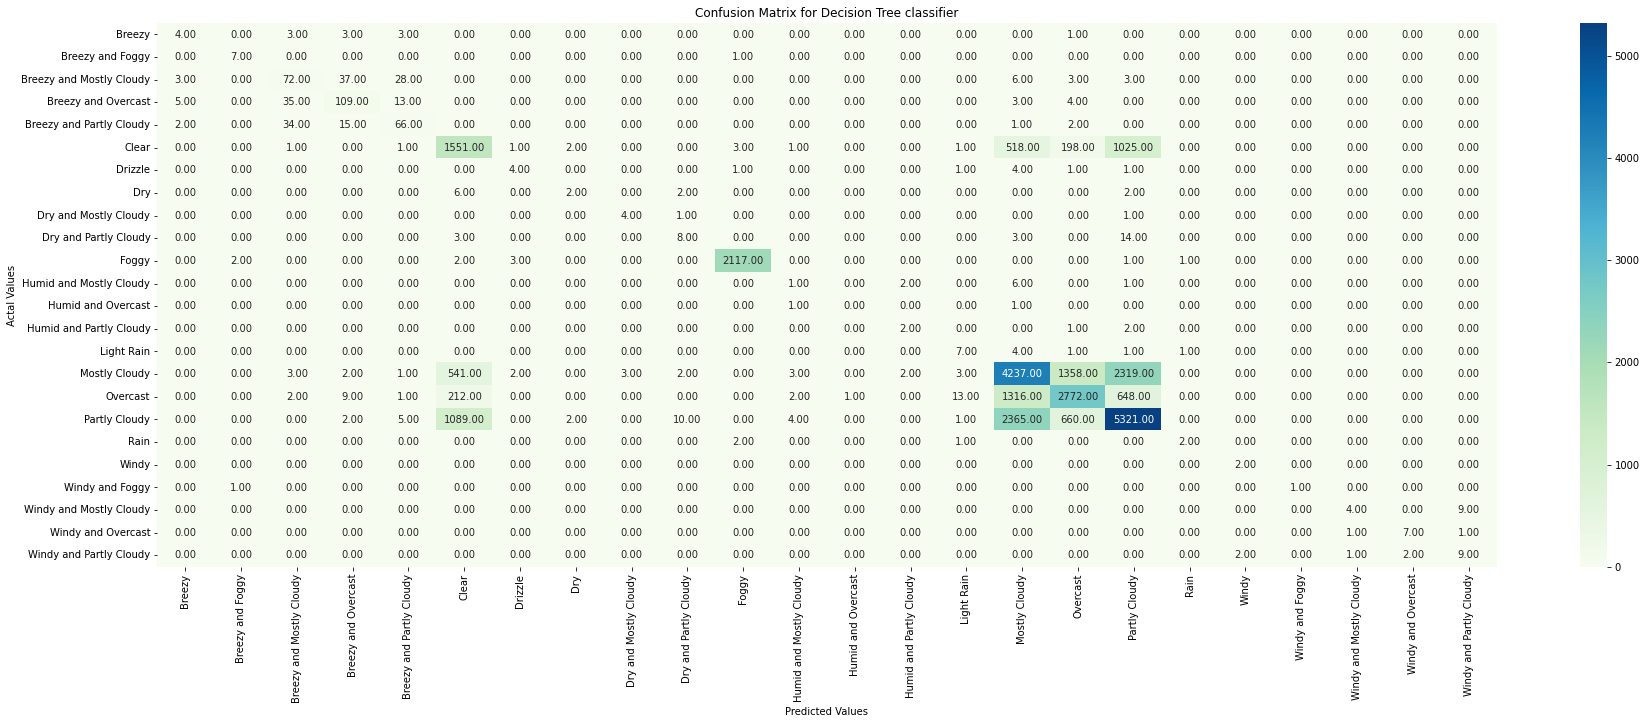

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,decisiontree_classifier_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = confusion_matrix_labels ,
                     columns = confusion_matrix_labels)

#Plotting the confusion matrix
plt.figure(figsize=(30,10))
sns.heatmap(cm_df, annot=True, fmt=".2f",cmap="GnBu")
plt.title('Confusion Matrix for Decision Tree classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('Confusion Matrix for Decision Tree classifier.jpg',bbox_inches='tight')
plt.show()

**Random forest classifier**

In [ ]:
randomforest_classifier= RandomForestClassifier()
randomforest_classifier.fit(x_train_scaled, y_train)
randomforest_classifier_pred= randomforest_classifier.predict(x_test_scaled)

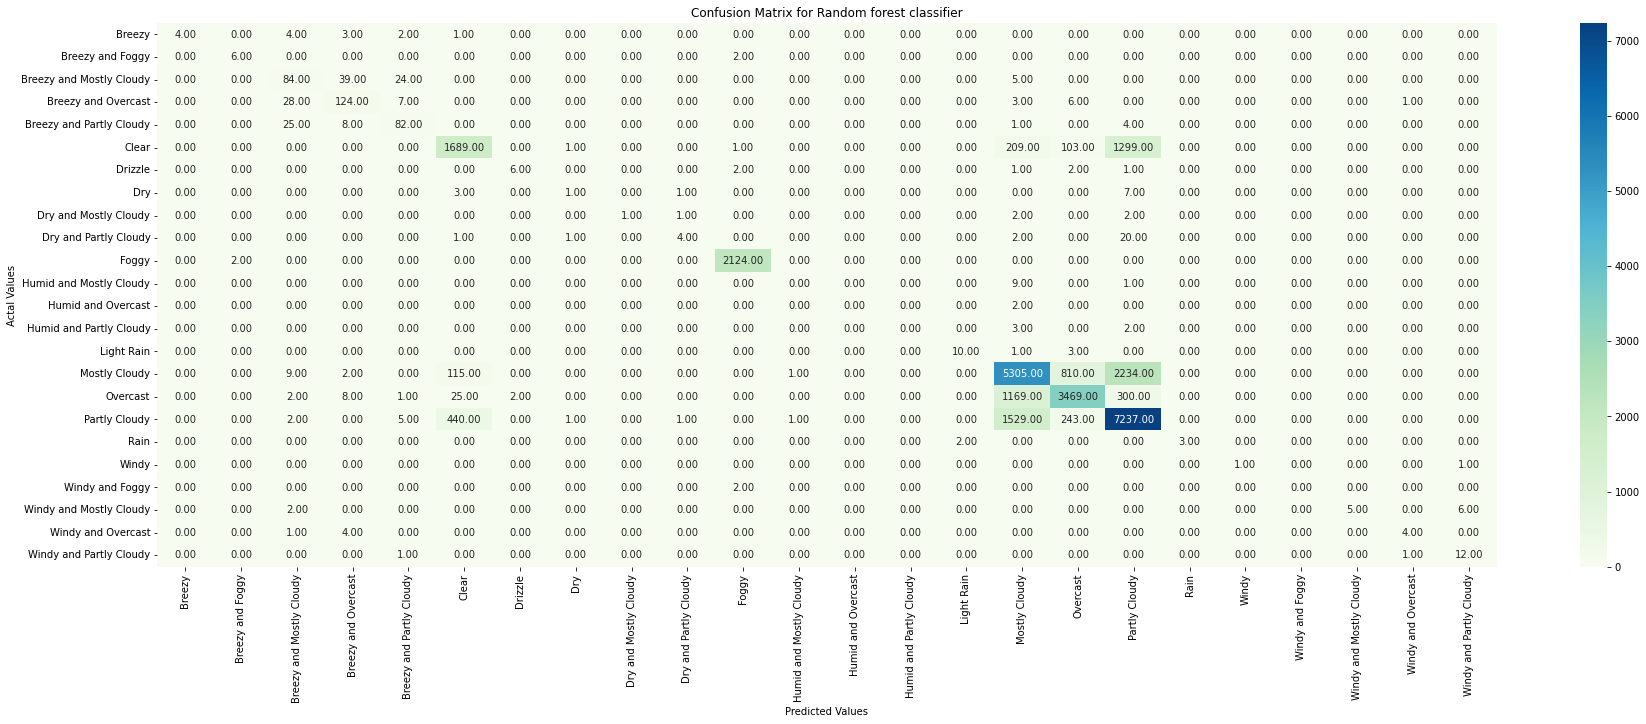

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,randomforest_classifier_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = confusion_matrix_labels ,
                     columns = confusion_matrix_labels)

#Plotting the confusion matrix
plt.figure(figsize=(30,10))
sns.heatmap(cm_df, annot=True, fmt=".2f",cmap="GnBu")
plt.title('Confusion Matrix for Random forest classifier')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('Confusion Matrix for Random forest classifier.jpg',bbox_inches='tight')
plt.show()

**K-Means Clustering**

In [ ]:
kmeans_cluster= KMeans(n_clusters=27) #n= 27(number of classes)
kmeans_cluster.fit(x_train_scaled)
kmeans_pred=kmeans_cluster.predict(x_test_scaled)


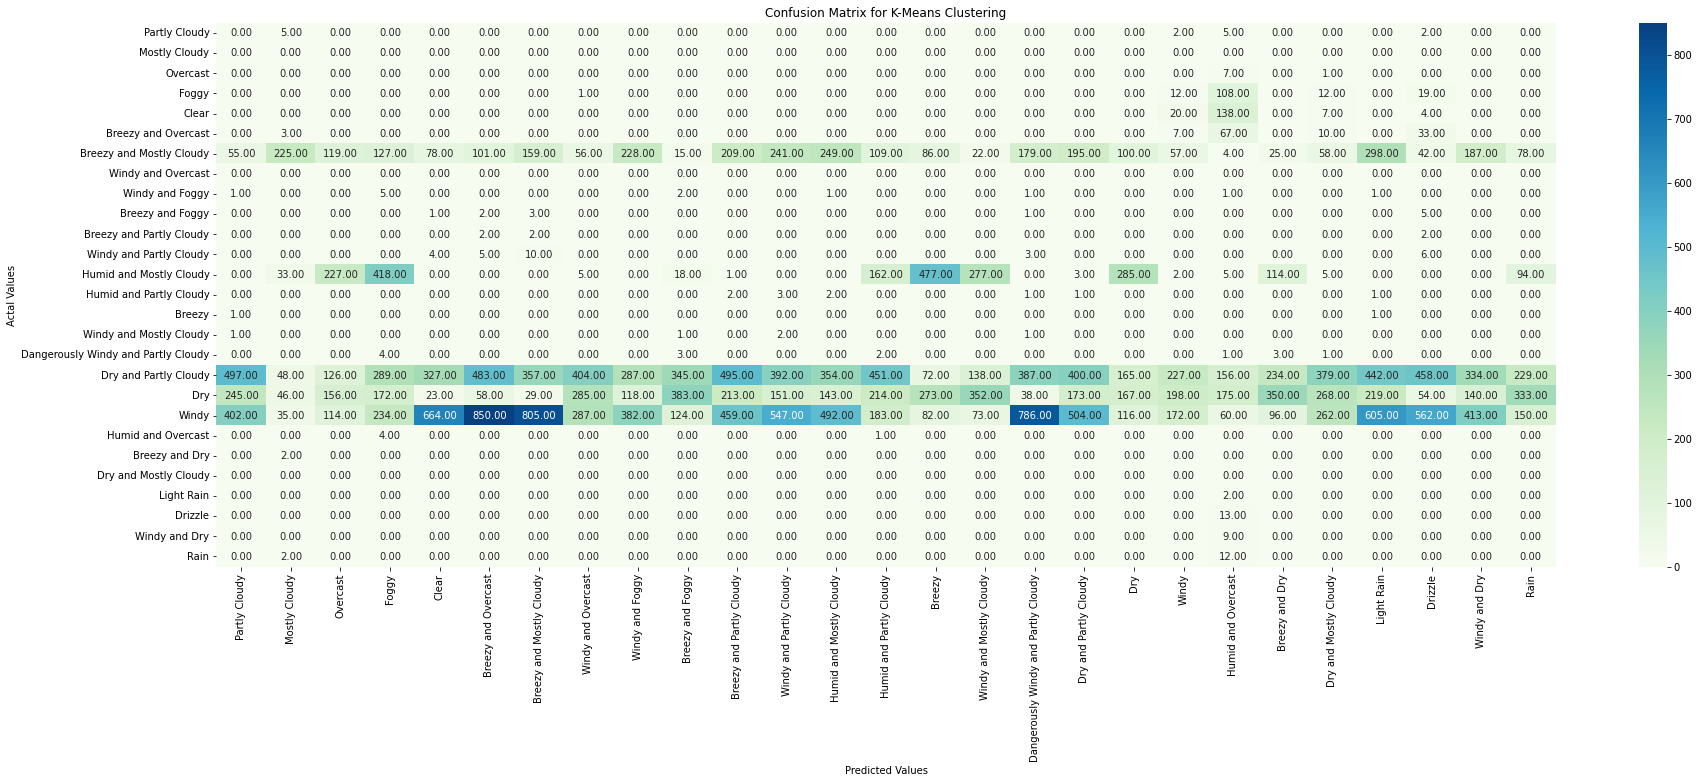

In [ ]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test,kmeans_pred)

# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index =summary_encoder.inverse_transform(df['Summary'].unique()) ,
                     columns = summary_encoder.inverse_transform(df['Summary'].unique())
                     )

#Plotting the confusion matrix
plt.figure(figsize=(30,10))
sns.heatmap(cm_df, annot=True, fmt=".2f",cmap="GnBu")
plt.title('Confusion Matrix for K-Means Clustering')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.savefig('Confusion Matrix for K-Means Clustering.jpg',bbox_inches='tight')
plt.show()

# **ACCURACY GRAPH**

In [ ]:
# Get the accuracy score for all the five classifiers
knn_acc_score=accuracy_score(y_test, knn_pred)
svc_acc_score=accuracy_score(y_test, svc_pred)
decisiontree_acc_score= accuracy_score(y_test, decisiontree_classifier_pred)
randomforesttree_acc_score= accuracy_score(y_test, randomforest_classifier_pred)
kmeans_acc_score= accuracy_score(y_test, kmeans_pred)

In [ ]:
# Creating a dataframe of accuracy scores,so it will be easy for plotting.
Accuracy={'K Nearest neighbor classifier': [knn_acc_score], 'Support vector classifier': [svc_acc_score],  'Decision Tree classifier': [decisiontree_acc_score],
          'Random forest classifier': [randomforesttree_acc_score], 'K-Means Clustering' :[kmeans_acc_score]}
df_accuracy=pd.DataFrame(Accuracy).T

In [ ]:
# rename the dataframe column and convert the scores to percentage
df_accuracy.rename(columns={0: 'Accuracy Score'}, inplace=True)
df_accuracy['Accuracy Score']=df_accuracy['Accuracy Score'] * 100

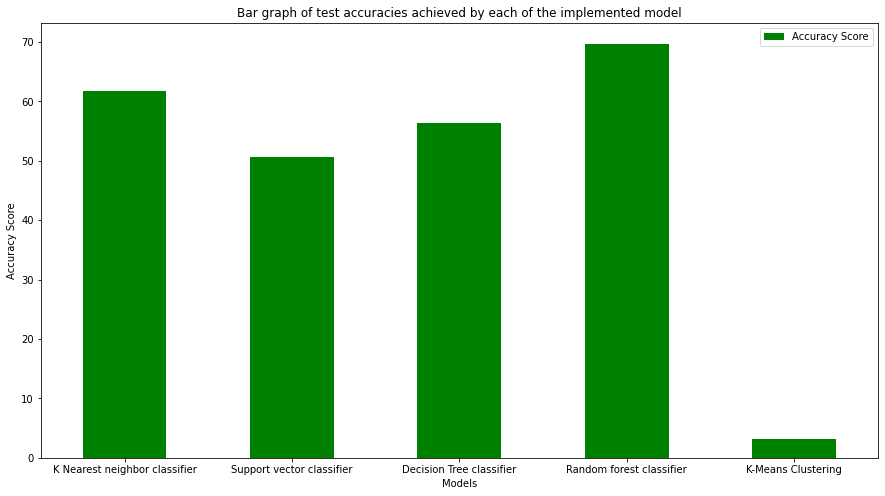

In [ ]:
#Ploting bar graph of test accuracies achieved by each of the implemented model
df_accuracy.plot(kind='bar', figsize=(15, 8), color='green')
plt.xlabel('Models')
plt.xticks(rotation=0)
plt.ylabel('Accuracy Score')
plt.title('Bar graph of test accuracies achieved by each of the implemented model')
plt.savefig('Bar graph of test accuracies achieved by each of the implemented model.jpg',bbox_inches='tight')
plt.show()

In [ ]:
df_accuracy

,Accuracy Score
K Nearest neighbor classifier,61.725878
Support vector classifier,50.656622
Decision Tree classifier,56.362317
Random forest classifier,69.709013
K-Means Clustering,3.103401
